<a href="https://colab.research.google.com/github/Pradyumn-30/Skin-Cancer-Classification-with-CNN/blob/main/Skin_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary packages**

In [1]:
import os
import glob
import random
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Mounting Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.listdir('/content/drive/MyDrive/data/train/')

['malignant', 'benign']

In [4]:
os.getcwd()

'/content'

In [5]:
os.chdir('../../')

In [6]:
## setting the train set and valid set path
train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/test'

**Checking the number of images in the training set and validation set**

In [8]:
len(os.listdir(train_path + '/benign'))

1440

In [9]:
len(os.listdir(train_path + '/malignant'))

1197

Training set has 1440 images for benign and 1197 images for malignant

In [10]:
len(os.listdir(valid_path + '/benign'))

360

In [11]:
len(os.listdir(valid_path + '/malignant'))

300

Validation set has 360 images for benign and 300 images for malignant

**Plotting the images**

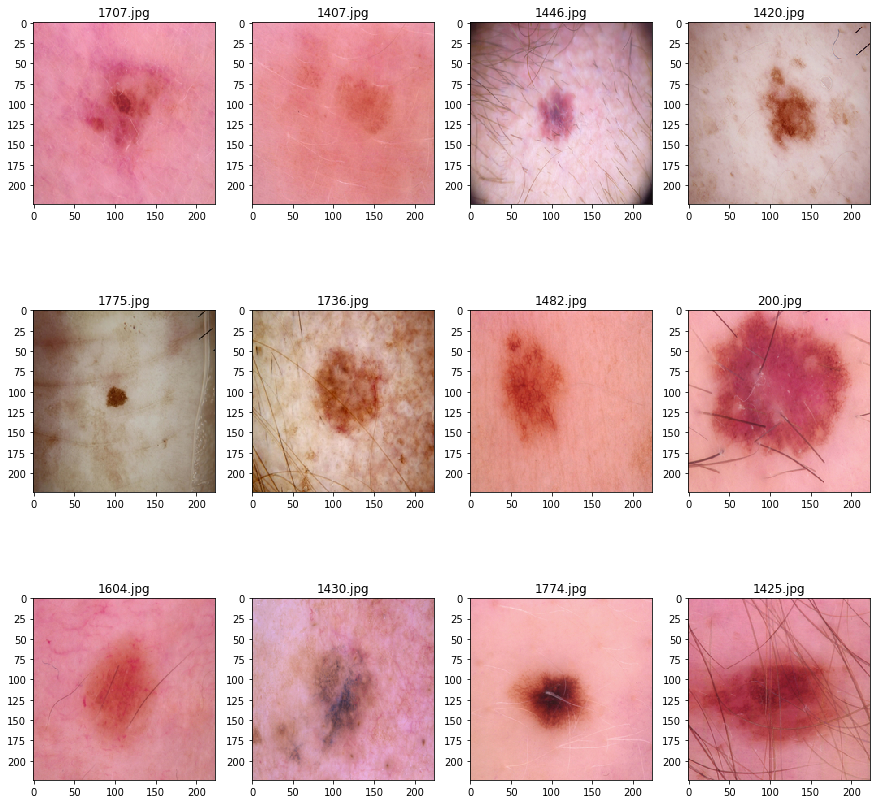

In [12]:
## Displaying the first 12 benign images from the training set
 
fig = plt.figure(figsize = (15,15))
columns = 4
rows = 3
i = 1
 
for img_name in os.listdir(train_path+'/benign'):
    img = train_path + '/benign' +'/'+ img_name
    img = plt.imread(img)
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img, interpolation = 'nearest')
    ax.title.set_text(img_name)
    i = i+1
    if i == columns*rows+1:
        break
    
plt.show()

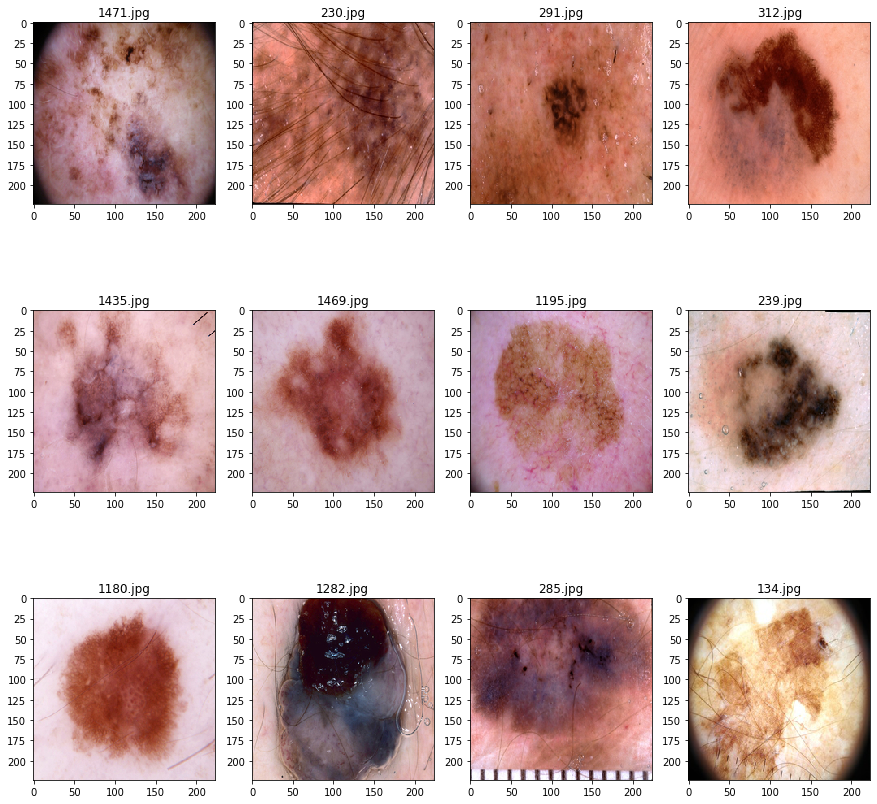

In [13]:
## Displaying the first 12 malignant images from the training set
 
fig = plt.figure(figsize = (15,15))
columns = 4
rows = 3
i = 1
 
for img_name in os.listdir(train_path+'/malignant'):
    img = train_path + '/malignant/' + img_name
    img = plt.imread(img)
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img, interpolation = 'nearest')
    ax.title.set_text(img_name)
    i = i+1
    if i == columns*rows+1:
        break
    
plt.show()

**Checking the dimension for each image**

In [14]:
images = os.listdir(train_path + '/benign/')

In [ ]:
width, height = [], []
 
for image_name in images:
    img = plt.imread(train_path+ '/benign/' + image_name)
    w, h, c = img.shape
    width.append(w)
    height.append(h)

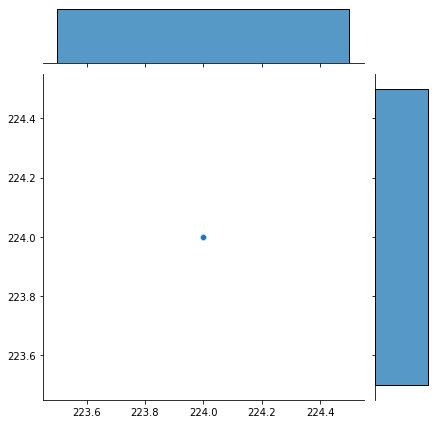

In [ ]:
sns.jointplot( x = width, y = height, kind = 'scatter')
plt.show()

All images have dimension (224 x 224 x 3)

In [ ]:
import numpy as np

print('Mean width: {}'.format(np.mean(width)))

print('Mean Height: {}'.format(np.mean(height)))

We will keep the size of the image as (224 x 224 x 3)

In [15]:
IMAGE_SIZE = (224, 224, 3)

**Checking images are scaled or not**

In [16]:
img_name = os.listdir(train_path + '/benign')[0]
img = plt.imread(train_path+'/benign/'+img_name)
 
print('Maximum pizel value: {}'.format(np.max(img)))
 
print('Minimum pizel value: {}'.format(np.min(img)))
 
## Image is not scaled

Maximum pizel value: 248
Minimum pizel value: 29


**Creating Image Data Generator for Training and Validation set**

In [17]:
## Creating data generator for training set and validation set
 
## Also scaling the pixels from 0 to 255 to 0 to 1
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 20,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)
 
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
## Creating training and validation batches for the model
 
train_batches = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (224, 224),
                                                 classes = ['benign','malignant'],
                                                 batch_size = 10,
                                                 shuffle = True, class_mode = 'binary', seed = 100)
 
valid_batches = valid_datagen.flow_from_directory(directory = valid_path,
                                                 target_size = (224, 224),
                                                 classes = ['benign','malignant'],
                                                 batch_size = 10,
                                                 shuffle = False, class_mode = 'binary', seed = 100)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [19]:
train_batches.class_indices

{'benign': 0, 'malignant': 1}

**Let us see how the training batch looks like**

In [20]:
imgs, labels = next(train_batches) ## getting first 10 images (1st batch)
 
## Everytime this line of code is run next 10 images are selected

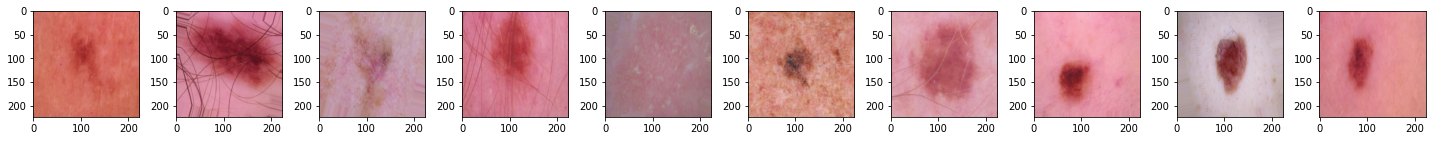

In [21]:
fig, axes = plt.subplots(1, 10, figsize = (20,20))
axes = axes.flatten()
for img, ax in zip(imgs, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

In [22]:
#labels give coresponding target value for the images
 
labels

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
img = imgs[0] ## Here we can select any image
 
print('Maximum pixel value: {}'.format(np.max(img)))
 
print('Minimum pixel value: {}'.format(np.min(img)))

Maximum pixel value: 0.9193897843360901
Minimum pixel value: 0.1448739767074585


Note how the image size and maximum and minimum pixel value are changed

Now the images are rescaled!!

**Building CNN model**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
 
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model = Sequential()
 
model.add(Convolution2D(filters = 64, kernel_size =  (3,3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
 
model.add(Convolution2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
 
model.add(Convolution2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
 
model.add(Convolution2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
 
model.add(Flatten())
 
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [26]:
model.compile(optimizer = 'adam' ,
              loss = 'binary_crossentropy',
              metrics = ['AUC'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9

In [28]:
len(train_batches) 
 
## length of the training batch is size of training set // Batch size

264

In [29]:
len(valid_batches)
 
## length of the validation batch is size of validation set // Batch size

66

In [30]:
r = model.fit(train_batches,
                        steps_per_epoch = len(train_batches),
                        epochs = 100,
                        validation_data = valid_batches,
                        validation_steps = len(valid_batches),
                        callbacks = EarlyStopping(monitor='val_loss', patience = 10))
 
## using Early stopping to prevent possible overfitting

Epoch 1/100
264/264 [==============================] - 764s 3s/step - loss: 0.6389 - auc: 0.6819 - val_loss: 0.5351 - val_auc: 0.8097
Epoch 2/100
264/264 [==============================] - 36s 135ms/step - loss: 0.4878 - auc: 0.8270 - val_loss: 0.4301 - val_auc: 0.8821
Epoch 3/100
264/264 [==============================] - 36s 135ms/step - loss: 0.4644 - auc: 0.8490 - val_loss: 0.4060 - val_auc: 0.8943
Epoch 4/100
264/264 [==============================] - 35s 134ms/step - loss: 0.4481 - auc: 0.8585 - val_loss: 0.3803 - val_auc: 0.9087
Epoch 5/100
264/264 [==============================] - 36s 135ms/step - loss: 0.4383 - auc: 0.8706 - val_loss: 0.3991 - val_auc: 0.8850
Epoch 6/100
264/264 [==============================] - 36s 135ms/step - loss: 0.4280 - auc: 0.8691 - val_loss: 0.3888 - val_auc: 0.9011
Epoch 7/100
264/264 [==============================] - 36s 135ms/step - loss: 0.4087 - auc: 0.8842 - val_loss: 0.3803 - val_auc: 0.9174
Epoch 8/100
264/264 [=============================

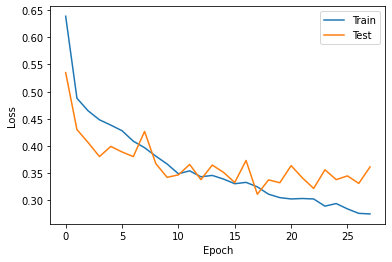

In [31]:
plt.plot(r.history['loss'], label = 'Train')
plt.plot(r.history['val_loss'], label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

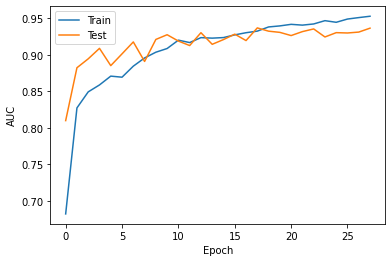

In [32]:
plt.plot(r.history['auc'], label = 'Train')
plt.plot(r.history['val_auc'], label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [34]:
scores = model.evaluate(train_batches, verbose=2)
print('Train AUC:', scores[1])
 
scores = model.evaluate(valid_batches, verbose=2)
print('Test AUC:', scores[1])

264/264 - 30s - loss: 0.2572 - auc: 0.9610
Train AUC: 0.9609741568565369
66/66 - 2s - loss: 0.3613 - auc: 0.9363
Test AUC: 0.9363147616386414


**Training AUC: 0.96**
 
**Test AUC: 0.94**

In [35]:
## saving the model
model.save('Skin-Cancer-Classification-AUC.h5')